Importar librerias


In [55]:
import numpy as np  # Librería para manejo de arreglos numéricos
import pandas as pd  # Librería para manipulación de datos en estructuras tipo DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict  # Métodos de validación cruzada
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error  # Función para calcular el error cuadrático medio (MSE)
from sklearn.linear_model import LinearRegression, ElasticNet  # Modelos de regresión lineal y Elastic Net
from sklearn.neighbors import KNeighborsRegressor  # Modelo de K Vecinos más Cercanos
from sklearn.cross_decomposition import PLSRegression  # Regresión de Mínimos Cuadrados Parciales (PLS)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de Random Forest y Gradient Boosting

Importar datos

In [56]:
df = pd.read_excel("PruebaDatos.xlsx", sheet_name = "Cordoba")


In [57]:
df.head()

,Ano,T.Max,T.Min,P.Vapor,Precipitacion,Irradicion,WindSpeed,Departameto,Irrigacion,Toneladas por Hectaria
0,2000,32.96,23.19,38.08,31.71,4593.10,1.05,1,1,5975.913858
1,2001,33.26,23.83,39.21,31.93,4591.66,1.09,1,1,5601.195926
2,2002,33.83,24.14,40.24,31.99,4591.66,0.94,1,1,4057.597788
3,2003,33.19,24.11,39.43,30.53,4591.66,1.11,1,1,4398.120031
4,2004,33.34,24.44,40.12,30.79,4593.10,1.05,1,1,4612.752932


Partimos los datos 

In [58]:
features = ['T.Max', 'T.Min', 'P.Vapor', 'Precipitacion', "Departameto", "Irrigacion"]
X = df[features]
y = df['Toneladas por Hectaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #No entiendo random state 42

Modelo Regresión Lineal (Sin Interacciones)

In [59]:
# Crear y entrenar el modelo de regresión lineal sin interacciones
modelRL = LinearRegression()
modelRL.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelRL.predict(X_test)

# Evaluación del modelo
mse_rl = mean_squared_error(y_test, y_pred)
rmse_rl = np.sqrt(mse_rl)

print(f"MSE: {mse_rl}")
print(f"RMSE: {rmse_rl}")

MSE: 128489.34420469413
RMSE: 358.4541033447576


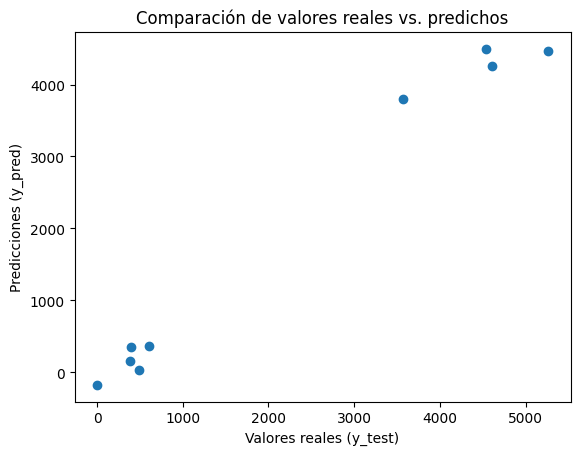

In [60]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Modelo Regresión Lineal (Con Interacciones de Segundo grado)

In [61]:
# Aplicar transformación polinómica de segundo grado (incluye términos de interacción)
poly = PolynomialFeatures(degree=2, include_bias=False)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con interacciones
modelRL = LinearRegression()
modelRL.fit(X_train_poly, y_train)

# Predicciones en los datos de prueba
y_pred = modelRL.predict(X_test_poly)

# Evaluación del modelo
mse_rl2 = mean_squared_error(y_test, y_pred)
rmse_rl2 = np.sqrt(mse_rl2)

print(f"MSE: {mse_rl2}")
print(f"RMSE: {rmse_rl2}")

MSE: 539107.5472116156
RMSE: 734.2394345250162


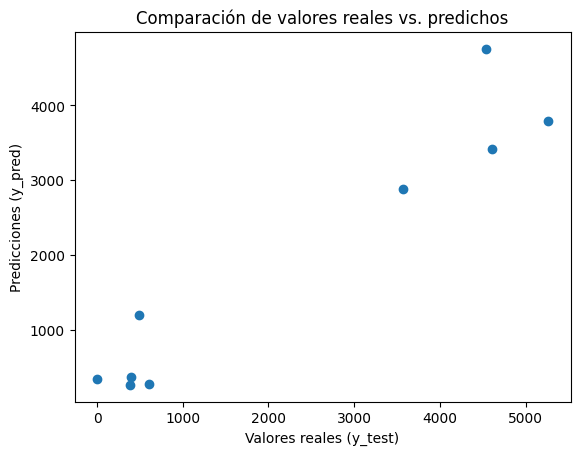

In [62]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Modelo Regresión Lineal (Con Interacciones de Tercer grado)

In [63]:
# Aplicar transformación polinómica de tercer grado
poly = PolynomialFeatures(degree=3, include_bias=False)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con interacciones de tercer grado
modelRL = LinearRegression()
modelRL.fit(X_train_poly, y_train)

# Predicciones en los datos de prueba
y_pred = modelRL.predict(X_test_poly)

# Evaluación del modelo
mse_rl3 = mean_squared_error(y_test, y_pred)
rmse_rl3 = np.sqrt(mse_rl3)

print(f"MSE: {mse_rl3}")
print(f"RMSE: {rmse_rl3}")

MSE: 37917009.84247931
RMSE: 6157.678933046064


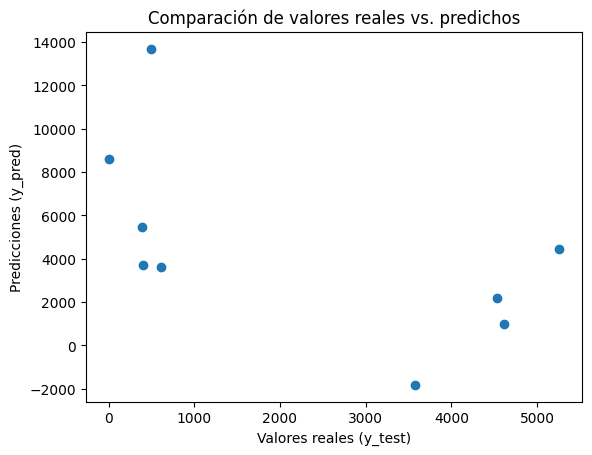

In [64]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Random Forest

In [65]:
# Crear y entrenar el modelo de Random Forest
modelRF = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 árboles
modelRF.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelRF.predict(X_test)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)

print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")

MSE: 86498.70100267249
RMSE: 294.1066150270553


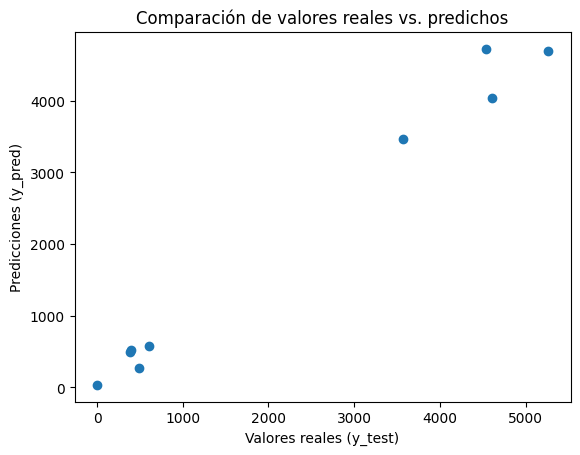

In [66]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Elastic Net

In [67]:
#Encontrar los mejores parametros
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  
    'l1_ratio': [0.2, 0.5, 0.8]
}

grid_search = GridSearchCV(ElasticNet(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

Mejores parámetros: {'alpha': 0.1, 'l1_ratio': 0.8}


In [68]:
# Crear y entrenar el modelo Elastic Net
modelEN = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42)  # α controla la regularización, l1_ratio mezcla L1 y L2
modelEN.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelEN.predict(X_test)

# Evaluación del modelo
mse_en = mean_squared_error(y_test, y_pred)
rmse_en = np.sqrt(mse_en)

print(f"MSE: {mse_en}")
print(f"RMSE: {rmse_en}")

MSE: 96381.19081952923
RMSE: 310.45320230193994


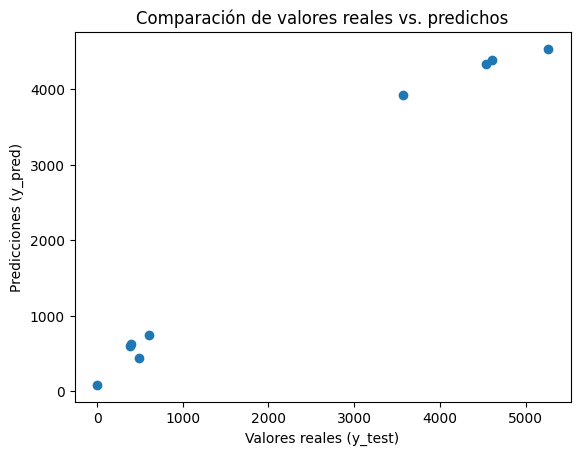

In [69]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

KNN

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Mejor valor de k: {best_k}")

Mejor valor de k: 4


In [71]:
# Crear y entrenar el modelo KNN con k=5
modelKNN = KNeighborsRegressor(n_neighbors=best_k)  # k=5 vecinos
modelKNN.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelKNN.predict(X_test)

# Evaluación del modelo
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")

MSE: 1546575.382276097
RMSE: 1243.6138396930523


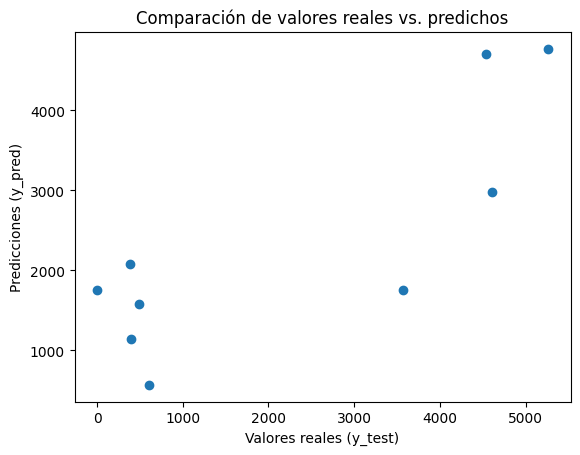

In [72]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

PLS

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_components': range(1, X_train.shape[1] + 1)}
grid_search = GridSearchCV(PLSRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_n = grid_search.best_params_['n_components']
print(f"Mejor número de componentes: {best_n}")

Mejor número de componentes: 2


In [74]:
# Crear y entrenar el modelo PLS con 2 componentes
modelPLS = PLSRegression(n_components=best_n)  # n_components define cuántas combinaciones lineales usar
modelPLS.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelPLS.predict(X_test)

# Evaluación del modelo
mse_pls = mean_squared_error(y_test, y_pred)
rmse_pls = np.sqrt(mse_pls)

print(f"MSE: {mse_pls}")
print(f"RMSE: {rmse_pls}")

MSE: 65594.31348554896
RMSE: 256.1138682023076


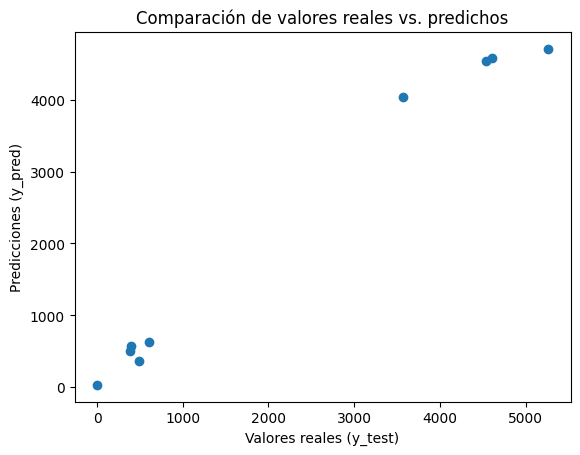

In [75]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Boosted Trees

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)
best_learning_rate = grid_search.best_params_['learning_rate']
best_max_depth = grid_search.best_params_['max_depth']
best_n_estimators = grid_search.best_params_['n_estimators']

Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}


In [77]:
# Crear y entrenar el modelo Boosted Trees
modelBoosted = GradientBoostingRegressor(n_estimators=best_n_estimators, learning_rate=best_learning_rate, max_depth=best_max_depth, random_state=42)
modelBoosted.fit(X_train, y_train)

# Predicciones en los datos de prueba
y_pred = modelBoosted.predict(X_test)

# Evaluación del modelo
mse_bt = mean_squared_error(y_test, y_pred)
rmse_bt = np.sqrt(mse_bt)

print(f"MSE: {mse_bt}")
print(f"RMSE: {rmse_bt}")

MSE: 261933.99216867363
RMSE: 511.79487313637054


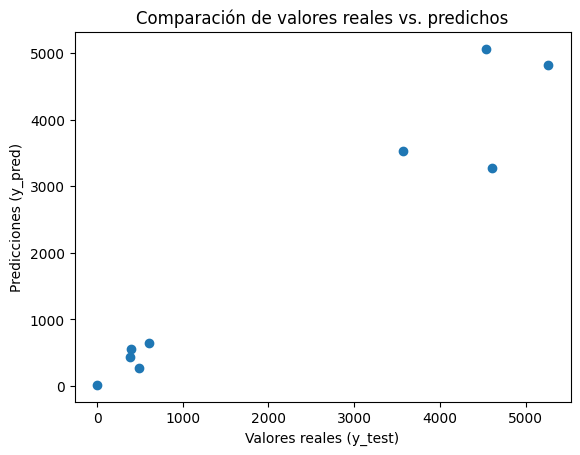

In [78]:
# Gráfico de valores reales vs. predicciones
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación de valores reales vs. predichos")
plt.show()

Encontrar el Mejor Modelo

In [80]:
# Guardar los resultados de cada modelo
resultados = {
    "Regresión Lineal": {"MSE": mse_rl, "RMSE": rmse_rl},
    "Regresión Lineal (2° grado)": {"MSE": mse_rl2, "RMSE": rmse_rl2},
    "Regresión Lineal (3° grado)": {"MSE": mse_rl3, "RMSE": rmse_rl3},
    "Random Forest": {"MSE": mse_rf, "RMSE": rmse_rf},
    "Elastic Net": {"MSE": mse_en, "RMSE": rmse_en},
    "KNN": {"MSE": mse_knn, "RMSE": rmse_knn},
    "PLS": {"MSE": mse_pls, "RMSE": rmse_pls},
    "Boosted Trees": {"MSE": mse_bt, "RMSE": rmse_bt}
}

# Ordenar por RMSE (menor es mejor)
mejor_modelo = min(resultados, key=lambda x: resultados[x]["RMSE"])

# Mostrar resultados
for modelo, errores in resultados.items():
    print(f"{modelo}: MSE = {errores['MSE']:.4f}, RMSE = {errores['RMSE']:.4f}")

print(f"\nEl mejor modelo es: {mejor_modelo} con RMSE de {resultados[mejor_modelo]['RMSE']:.4f}")

Regresión Lineal: MSE = 128489.3442, RMSE = 358.4541
Regresión Lineal (2° grado): MSE = 539107.5472, RMSE = 734.2394
Regresión Lineal (3° grado): MSE = 37917009.8425, RMSE = 6157.6789
Random Forest: MSE = 86498.7010, RMSE = 294.1066
Elastic Net: MSE = 96381.1908, RMSE = 310.4532
KNN: MSE = 1546575.3823, RMSE = 1243.6138
PLS: MSE = 65594.3135, RMSE = 256.1139
Boosted Trees: MSE = 261933.9922, RMSE = 511.7949

El mejor modelo es: PLS con RMSE de 256.1139
